# Homework 3: Unsupervised Learning and Graphical Models [25 pts]
## Comp562 Summer II 2023

### Due 11:59pm July 18, 2023

In this assignment, you will use the unsupervised learning algorithms and graphical models discussed in class and experiment with some toy data. To avoid unexpected behavior with cached variables, test your code with a fresh kernel.

### Problem 1: k-Mean Clustering [8 pts]

Use the dataset provided in `hw3_clustering.csv` for this problem.

**(1a)** Implement k-means clustering with arbitrary $k$. Solutions that directly use the sklearn implementation of k-means will not receive full credit. [4 pts]

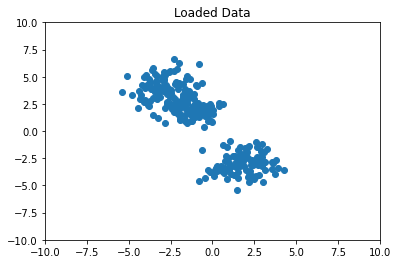

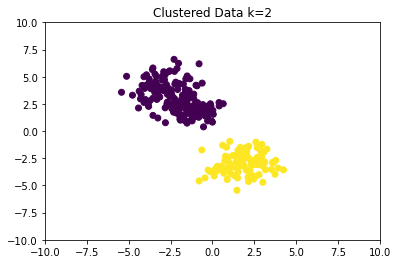

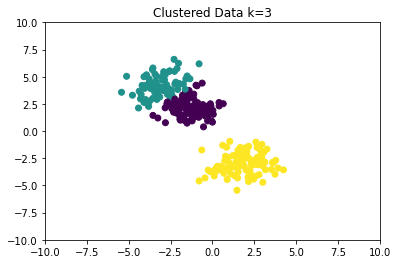

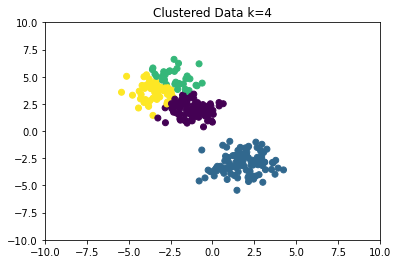

In [2]:
import numpy as np
import matplotlib.pyplot as plt  # visualization

#Loaded data
fn = 'hw3_clustering.csv'
test_data = np.genfromtxt(fn, delimiter=',')
plt.scatter(test_data[:,0], test_data[:,1])
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.title('Loaded Data')
plt.show()

def cluster(k, data):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    centroids_prev = None
    while True:
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)

        if np.array_equal(centroids, centroids_prev):
            break

        centroids_prev = np.copy(centroids)

        for i in range(k):
            cluster_points = data[labels == i]
            centroids[i] = np.mean(cluster_points, axis=0)
    return labels


#Plot - Clustered Data
k = 2
labels = cluster(k, test_data)
plt.scatter(test_data[:, 0], test_data[:, 1], c=labels)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title(f'Clustered Data k={k}')
plt.show()

k = 3
labels = cluster(k, test_data)
plt.scatter(test_data[:, 0], test_data[:, 1], c=labels)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title(f'Clustered Data k={k}')
plt.show()

k = 4
labels = cluster(k, test_data)
plt.scatter(test_data[:, 0], test_data[:, 1], c=labels)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title(f'Clustered Data k={k}')
plt.show()

**(1b)** What value of $k$ makes sense for this data? (You may consider plotting the clusters produced for various values of $k$.) [2 pts]

The value of K that made the most sense for this data is two. 

**(1c)** Justify your choice of inital centroids. [2 pts]

I chose random inital centroids for the following reasons:
- Using random inital centroids prevents the clusters from converging to local minima
- Quick method of choosing centroids and is assumed not to be bias
- Random inital centroids will produce a range of different solutions by trying different initial positions for clusterings
- Covers a large area of the data space from initialization

### Problem 2: Dimensionality Reduction [8 pts]

Use the dataset provided in `hw3_pca.csv` for this problem.

**(2a)** Implement PCA using the SVD method described in class. Feel free to use [np.linalg.svd](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) for the SVD operation. Solutions that directly use the sklearn implementation of PCA will not receive full credit. Also implement computation of the covariance matrix yourself. [4 pts]

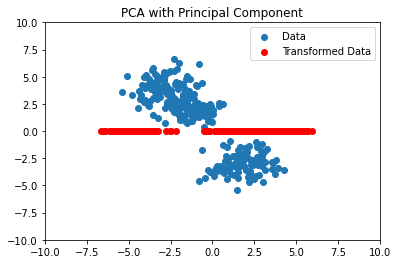

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: load data
fn = 'hw3_pca.csv'

# TODO: implement PCA
def pca(data, num_components):

    centered_data = data - np.mean(data, axis=0)
    cov_matrix = np.cov(centered_data, rowvar=False)
    transformation = np.dot(centered_data, np.linalg.svd(cov_matrix)[2][:num_components].T)

    return transformation

transformation = pca(test_data, 1)

#Plot - Orig vs. PCA
plt.scatter(test_data[:, 0], test_data[:, 1], label='Data')
plt.scatter(transformation, np.zeros(transformation.shape[0]), c='red', label='Transformed Data')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.legend()
plt.title('PCA with Principal Component')
plt.show()

**(2b)** Project the data onto the first 2 principal components and plot them in coefficient space. [2 pts]

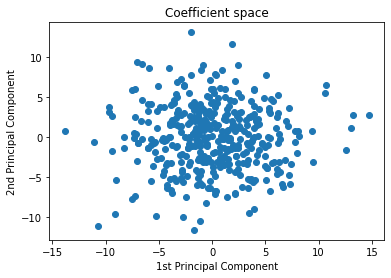

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: load data
fn = 'hw3_pca.csv'
test_data = np.genfromtxt(fn, delimiter=',')

# TODO: find projection and plot 
def pca(data, components):
    
    centered_data = data - np.mean(data, axis=0)
    cov_matrix = np.cov(centered_data, rowvar=False)
    transformation = np.dot(centered_data, np.linalg.svd(cov_matrix)[2][:components].T)
    
    return transformation

transformation = pca(test_data, 2)

#Plot
plt.scatter(transformation[:, 0], transformation[:, 1])
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Coefficient space')
plt.show()

**(2c)** What do the principal components represent? [2 pts]

The principal components represent the directions of maximum variance.

### Problem 3: Graphical Models/Hidden Markov Models [9 pts]

**(3a)** What is the 1st order Markov assumption? [1 pt]

The first order assumption is that the future of the system solely depends on the current state. Previous states do not shape the future state of the system.

**(3b)** What is the benefit of separating the latent variables and observations? [2 pts]

- Creates simple model that can simulate complex phenomenon in sequential data
- Can help when dealing with missing variables
- By seperating latent variables and observation we can reduce dimensionality

**(3c)** In hidden Markov models, what is the difference between emission and transition probabilities? [2 pts]

Emission probabilites are the probabilities of observing particular data points in the current given state. Emission probabilites model the likelihood of the observation of data points.

Transition probabilites are the probabilities of transitioning from one hidden state to another. Transition probabilites modely how the system changes over time.

**(3d)** What is the difference between latent states and latent variables? [2 pts]

Latent states are the unobservable states that form the generated data. 
The use of latent states incoroporate time series modeling in to the model.

Latent variables are used to represent unobserved factors and is assumed to exist. We use latent variables to capture hidden relationships to improve model performance. 

**(3e)** The Viterbi algorithm is an example of dynamic programming where the computational savings come from solving recursive subproblems. Using the notation from class, why are we allowed to disregard $K^2-K$ paths at time step $n+1$? [2 pts]

You can disregard $K^2-K$ at time step $n+1$ because this path is less probable, in dynamic programming we can keep track of the path likelihood. We wouldn't want redundant or unnecessary ptahts